#                                             Covid-19 Analysis

In [37]:
#importing libraries and setting path
import pandas as pd
import numpy as np
import seaborn as sns
covid_confirm='C:\\Users\\HARSH\\Desktop\\harsh\\SDSU docs\\BigData\\covid-19\\covid-19\\covid_confirmed_usafacts.csv'
covid_deaths='C:\\Users\\HARSH\\Desktop\\harsh\\SDSU docs\\BigData\\covid-19\\covid-19\\covid_deaths_usafacts.csv'
county_pop='C:\\Users\\HARSH\\Desktop\\harsh\\SDSU docs\\BigData\\covid-19\\covid-19\\covid_county_population_usafacts.csv'
#Setting the path to all names files
folder=glob.glob('./names/*.txt')
covid_confirm=pd.read_csv(covid_confirm)
covid_deaths=pd.read_csv(covid_deaths)
county_pop=pd.read_csv(county_pop)

In [38]:
covid_confirm

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,6,6,7,7,10,10,12,12,12,12
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,10,15,18,19,23,25,28,29,34,38
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0,0,2,3,3,4,4,4,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,1,1,2,2,3,3,3,4,5,5
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,14,14,17,23,26,29,32,36,39,40
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,2,3
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,4,4


#  Total confirmed cases per day in the country

In [39]:
#Getting number of cases in US every date
sum=covid_confirm.sum(axis=0)
sum= sum[4:]
sum.index = pd.to_datetime(sum.index)
sum.to_frame()

,0
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2020-04-02,241643
2020-04-03,276889
2020-04-04,310597
2020-04-05,335338


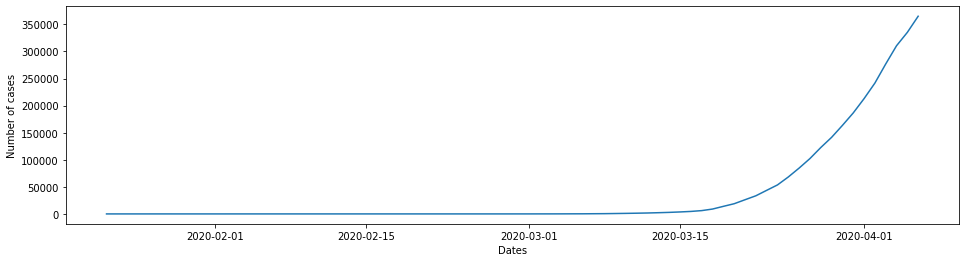

In [40]:
#Plotting the number of cases in US
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.plot(sum.index, sum.values)
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.show()

#  Total confirmed cases per week in the country

In [41]:
#Creating a weekly table having number of cases every week
weekly= sum[5::7]
weekly=weekly.to_frame()
weekly

,0
2020-01-27,9
2020-02-03,11
2020-02-10,11
2020-02-17,13
2020-02-24,15
2020-03-02,53
2020-03-09,727
2020-03-16,4602
2020-03-23,43544
2020-03-30,163487


Text(0, 0.5, 'Number of Weekly Cases')

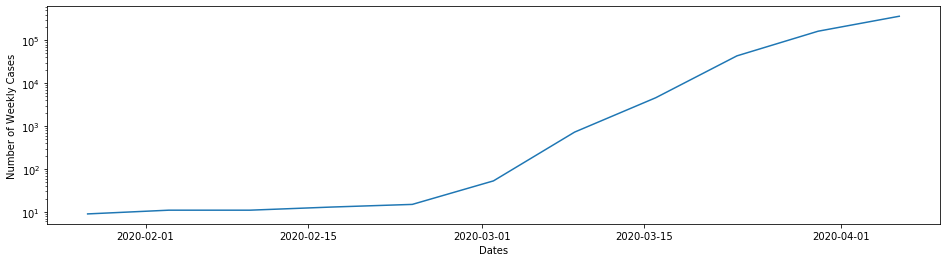

In [42]:
#Plotting the number of cases weekly
plt.figure(figsize=(16, 4))
plt.plot(weekly.index,weekly.values)
plt.yscale('log')
plt.xlabel('Dates')
plt.ylabel('Number of Weekly Cases')

### We can observe that till 1st March there is not much increase in Covid-19 cases but since then the graph has been a straight increasing line, hence the number of cases has increased exponentially.

# Number of new confirmed cases per week in the the country. 

In [43]:
new_cases= covid_confirm.iloc[:,4:]
new_cases

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,6,6,7,7,10,10,12,12,12,12
2,0,0,0,0,0,0,0,0,0,0,...,10,15,18,19,23,25,28,29,34,38
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,3,3,4,4,4,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,0,0,0,0,0,0,0,0,0,0,...,1,1,2,2,3,3,3,4,5,5
3191,0,0,0,0,0,0,0,0,0,0,...,14,14,17,23,26,29,32,36,39,40
3192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,2,3
3193,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,4,4


In [44]:
#Getting the number of new cases by subtracting from the previous date cases
new_case=new_cases.T.diff().T
new_case['1/22/2020']=new_cases['1/22/2020']
new_case

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,3.0,1.0,4.0,2.0,3.0,1.0,5.0,4.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3191,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,3.0,6.0,3.0,3.0,3.0,4.0,3.0,1.0
3192,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3193,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0


In [45]:
weekly_sum=new_case.sum(axis=0)
weekly_sum.index = pd.to_datetime(weekly_sum.index)
weekly_sum=weekly_sum.resample('W-MON').sum()
weekly_sum.to_frame()

,0
2020-01-27,9.0
2020-02-03,2.0
2020-02-10,0.0
2020-02-17,2.0
2020-02-24,2.0
2020-03-02,38.0
2020-03-09,674.0
2020-03-16,3875.0
2020-03-23,38942.0
2020-03-30,119943.0


#  Total number of deaths per week in the country

In [46]:
covid_deaths


,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3194,56045,Weston County,WY,56,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#Getting weekly deaths
total_deaths= covid_deaths.iloc[:,4:]
weekly_deaths=total_deaths.sum(axis=0)
weekly_deaths_sum=weekly_deaths[5::7]
weekly_deaths_sum.to_frame()

,0
1/27/2020,0.0
02-03-2020,0.0
02-10-2020,0.0
2/17/2020,0.0
2/24/2020,0.0
03-02-2020,6.0
03-09-2020,28.0
3/16/2020,96.0
3/23/2020,547.0
3/30/2020,3003.0


C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of Deaths')

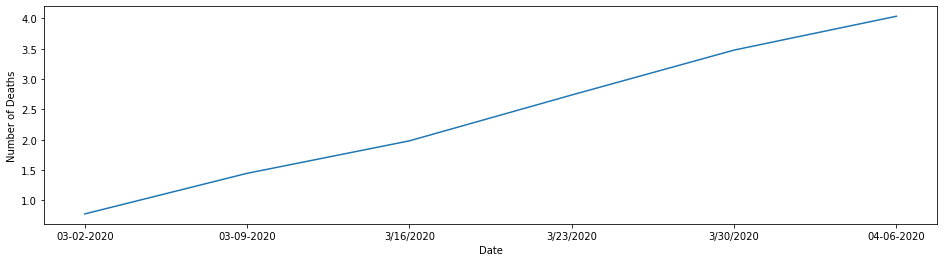

In [48]:
#plotting weekly deaths
plt.figure(figsize=(16, 4))
plt.plot(weekly_deaths_sum.index, np.log10(weekly_deaths_sum.values))
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#.bar(num_passengers.values,num_passengers.index)
plt.xlabel('Date')
plt.ylabel('Number of Deaths')

### From the above graph it is very clear that death rate in US has been exponential in nature

# 10 counties with the most known number of covid-19 cases.

In [49]:
covid_confirm

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,6,6,7,7,10,10,12,12,12,12
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,10,15,18,19,23,25,28,29,34,38
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0,0,2,3,3,4,4,4,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,1,1,2,2,3,3,3,4,5,5
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,14,14,17,23,26,29,32,36,39,40
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,2,3
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,4,4


In [50]:
#Getting counties with top 10 cases in US 
top_10=covid_confirm.nlargest(10,['4/6/2020'])
top_10

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
1903,36081,Queens County,NY,36,0,0,0,0,0,0,...,9831,10737,12756,13869,15217,16819,18823,20114,21436,23133
1886,36047,Kings County,NY,36,0,0,0,0,0,0,...,8129,8887,10171,11160,12274,13290,15700,17504,18558,19702
1892,36059,Nassau County,NY,36,0,0,0,0,0,0,...,5537,6445,7344,8544,9554,10587,12024,13346,14398,15616
1865,36005,Bronx County,NY,36,0,0,0,0,0,0,...,5752,6250,6925,7814,8607,9343,11086,12315,13368,14327
1922,36119,Westchester County,NY,36,0,0,0,0,0,0,...,7875,8519,9329,9967,10683,11567,12351,13081,13723,14294
1914,36103,Suffolk County,NY,36,0,0,0,0,0,0,...,4138,5023,5791,6713,7605,8746,10154,11370,12405,13487
1893,36061,New York County,NY,36,0,0,0,0,0,0,...,5237,5582,6060,6539,7022,7398,8452,9300,9898,10440
625,17031,Cook County,IL,17,0,0,1,1,1,1,...,2613,3445,3727,4496,5152,5575,6473,7439,8034,8728
1336,26163,Wayne County,MI,26,0,0,0,0,0,0,...,2316,2704,3195,3735,4470,5069,6096,6762,7518,8270
1807,34003,Bergen County,NJ,34,0,0,0,0,0,0,...,1838,2169,2482,2909,3494,4099,4866,5760,6187,6862


In [51]:
#Transposing the top 10 table
top_10s=top_10.iloc[:,9::7]
top_10s=top_10s.set_index(top_10['County Name'])
top_10s=top_10s.T
top_10s

County Name,Queens County,Kings County,Nassau County,Bronx County,Westchester County,Suffolk County,New York County,Cook County,Wayne County,Bergen County
1/27/2020,0,0,0,0,0,0,0,1,0,0
2/3/2020,0,0,0,0,0,0,0,2,0,0
2/10/2020,0,0,0,0,0,0,0,2,0,0
2/17/2020,0,0,0,0,0,0,0,2,0,0
2/24/2020,0,0,0,0,0,0,0,2,0,0
3/2/2020,0,0,0,0,0,0,1,4,0,0
3/9/2020,2,4,19,2,98,1,11,11,0,7
3/16/2020,118,62,109,34,220,63,111,77,14,61
3/23/2020,3621,3494,2442,1829,2894,1458,2572,922,638,609
3/30/2020,12756,10171,7344,6925,9329,5791,6060,3727,3195,2482


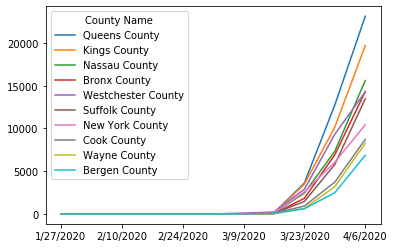

In [52]:
#Plotting the top 10 county's cases
top_10s.plot.line()

### In all counties after 9th March there has been an exponentially increase in number of cases
### Out of 10 counties with most cases, 7 are from NY state and other are from Eastern coast proving that Eastern coast has been affected the most in US

# Number of known cases per population in each county that have cases of covid-19.

In [53]:
#Filtering the Unallocated cases and case rate less than equal to 0 from dataset
covid_confirm=covid_confirm[~covid_confirm['County Name'].str.contains('Unallocated')]
covid_deaths=covid_deaths[~covid_deaths['County Name'].str.contains('Unallocated')]
county_pop=county_pop[~county_pop['County Name'].str.contains('Unallocated')]
covid_case_rate=covid_confirm

covid_case_rate['case_rate']=covid_confirm['4/6/2020']/county_pop['population']
covid_case_rate=covid_case_rate[covid_case_rate.case_rate >0]
covid_case_rate=covid_case_rate.replace(np.inf, np.nan).dropna()
covid_case_rate

C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,case_rate
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,6,7,7,10,10,12,12,12,12,0.000215
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,15,18,19,23,25,28,29,34,38,0.000170
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,0.000122
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0,2,3,3,4,4,4,7,7,0.000313
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,5,5,5,5,6,9,10,10,10,0.000173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56035,Sublette County,WY,56,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.000102
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,1,2,2,3,3,3,4,5,5,0.000118
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,14,17,23,26,29,32,36,39,40,0.001705
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0,0,0,0,1,1,2,2,3,0.000148


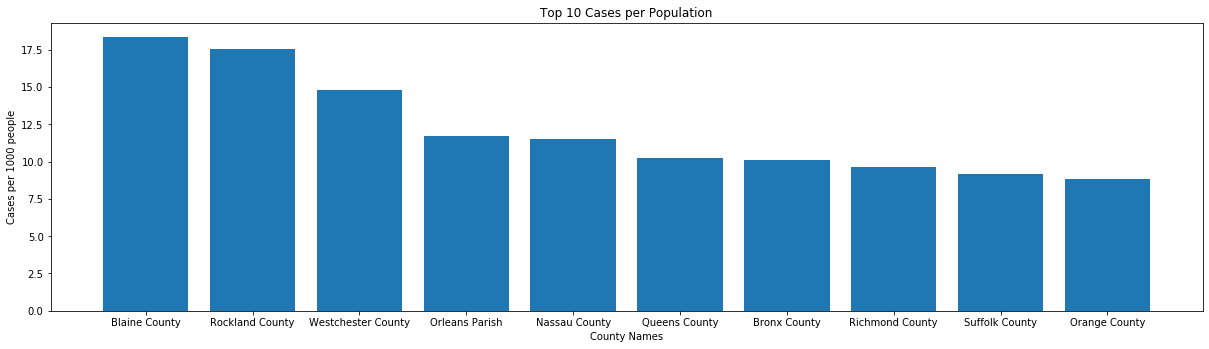

In [54]:
#Printing top 10 case_rate
covid_cases_refine=covid_case_rate
covid_cases_refine=covid_cases_refine[covid_cases_refine.case_rate !=0]
covid_cases_refine=covid_cases_refine.replace([np.inf, -np.inf], np.nan).dropna()
top_10_cases_ratio=covid_case_rate.nlargest(10,['case_rate'])

top_10_cases_ratio
fig = plt.figure(figsize=(16, 4))
ax = fig.add_axes([0,0,1,1])
ax.bar(top_10_cases_ratio['County Name'],top_10_cases_ratio.case_rate*1000)
ax.set_xlabel('County Names')
ax.set_ylabel('Cases per 1000 people')
plt.title('Top 10 Cases per Population')
plt.show()

In [55]:
top_10_cases_ratio

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,case_rate
571,16013,Blaine County,ID,16,0,0,0,0,0,0,...,115,148,192,256,351,405,410,410,423,0.018375
1906,36087,Rockland County,NY,36,0,0,0,0,0,0,...,2209,2511,2863,3321,3751,4289,4872,5326,5703,0.017505
1922,36119,Westchester County,NY,36,0,0,0,0,0,0,...,8519,9329,9967,10683,11567,12351,13081,13723,14294,0.014774
1168,22071,Orleans Parish,LA,22,0,0,0,0,0,0,...,1350,1480,1834,2270,3148,3476,3966,4066,4565,0.011701
1892,36059,Nassau County,NY,36,0,0,0,0,0,0,...,6445,7344,8544,9554,10587,12024,13346,14398,15616,0.011508
1903,36081,Queens County,NY,36,0,0,0,0,0,0,...,10737,12756,13869,15217,16819,18823,20114,21436,23133,0.010264
1865,36005,Bronx County,NY,36,0,0,0,0,0,0,...,6250,6925,7814,8607,9343,11086,12315,13368,14327,0.010102
1905,36085,Richmond County,NY,36,0,0,0,0,0,0,...,1984,2140,2354,2552,2822,3754,4073,4291,4579,0.009617
1914,36103,Suffolk County,NY,36,0,0,0,0,0,0,...,5023,5791,6713,7605,8746,10154,11370,12405,13487,0.009134
1898,36071,Orange County,NY,36,0,0,0,0,0,0,...,1247,1435,1560,1756,1993,2397,2741,3102,3397,0.008825


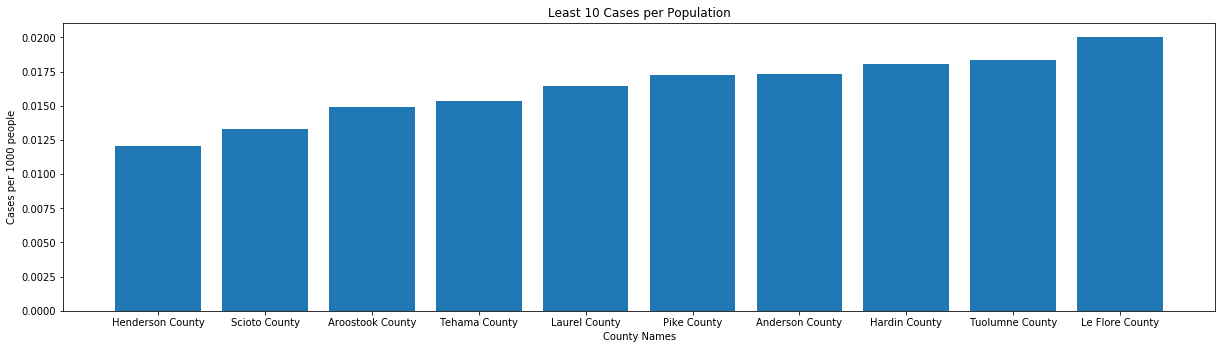

In [56]:
#Plotting the bottom 10 case_rate counties
bottom_10_cases_ratio=covid_cases_refine.nsmallest(10,['case_rate'])
bottom_10_cases_ratio=bottom_10_cases_ratio[bottom_10_cases_ratio['case_rate'] != 0]
bottom_10_cases_ratio
fig = plt.figure(figsize=(16, 4))
ax = fig.add_axes([0,0,1,1])
ax.bar(bottom_10_cases_ratio['County Name'],bottom_10_cases_ratio.case_rate*1000)
ax.set_xlabel('County Names')
ax.set_ylabel('Cases per 1000 people')
plt.title('Least 10 Cases per Population')
plt.show()


In [57]:
bottom_10_cases_ratio

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,case_rate
2675,48213,Henderson County,TX,48,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0.000012
2153,39145,Scioto County,OH,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000013
1199,23003,Aroostook County,ME,23,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0.000015
244,6103,Tehama County,CA,6,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,0.000015
1074,21125,Laurel County,KY,21,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.000016
1109,21195,Pike County,KY,21,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0.000017
2569,48001,Anderson County,TX,48,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0.000017
1058,21093,Hardin County,KY,21,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,0.000018
247,6109,Tuolumne County,CA,6,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0.000018
2209,40079,Le Flore County,OK,40,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.000020


#  The death rate (deaths/ known cases) in each county that have both deaths and known cases.

In [58]:
#Refining the data set  
covid_confirm_refine=covid_confirm[~covid_confirm['County Name'].str.contains('Unallocated')]
covid_deaths_refine=covid_deaths[~covid_deaths['County Name'].str.contains('Unallocated')]
covid_confirm_refine=covid_confirm_refine[covid_confirm_refine['4/6/2020']!=0]
covid_deaths_refine=covid_deaths_refine[covid_deaths_refine['04-06-2020']!=0]
covid_deaths_refine

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020
9,1017,Chambers County,AL,1,0,0,0,0,0,0,...,0,1,1,3,4.0,4.0,4.0,5.0,5.0,5.0
28,1055,Etowah County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,2.0,2.0,2.0
36,1071,Jackson County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0
37,1073,Jefferson County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,4.0,5.0
39,1077,Lauderdale County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,55131,Washington County,WI,55,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,3.0,3.0,3.0
3166,55133,Waukesha County,WI,55,0,0,0,0,0,0,...,0,0,0,0,1.0,1.0,1.0,3.0,4.0,4.0
3167,55135,Waupaca County,WI,55,0,0,0,0,0,0,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0
3169,55139,Winnebago County,WI,55,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
#Computing Death Rate
death_rate=covid_deaths_refine.iloc[:,1:3]
death_rate['death rate']=covid_deaths_refine['04-06-2020']/covid_confirm_refine['4/6/2020']*100
death_rate=death_rate[death_rate['death rate'] > 0]
death_rate=death_rate.replace(np.inf, np.nan).dropna()
death_rate

,County Name,State,death rate
9,Chambers County,AL,5.208333
28,Etowah County,AL,4.761905
36,Jackson County,AL,5.882353
37,Jefferson County,AL,1.141553
39,Lauderdale County,AL,6.250000
...,...,...,...
3158,Sheboygan County,WI,4.761905
3165,Washington County,WI,5.263158
3166,Waukesha County,WI,2.500000
3167,Waupaca County,WI,50.000000


In [60]:
#Getting Death Rate Standard Deviation
death_rate['death rate'].std(axis=0)

13.315468451842937

In [61]:
#Getting Death Rate Mean
death_rate['death rate'].mean(axis=0)

7.978306922949341

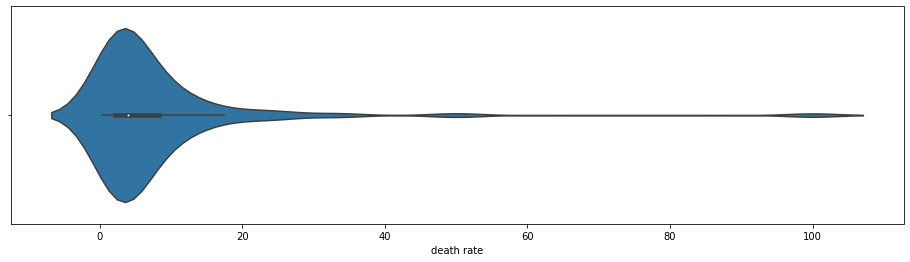

In [62]:
#Printing Violin plot
fig = plt.figure(figsize=(16, 4))
sns.violinplot('death rate', data=death_rate)

# Covid cases in New York

In [63]:
#Getting the New York Counties records and calculating the new cases
New_York=covid_confirm.loc[(covid_confirm['County Name'] == 'Bronx County') | (covid_confirm['County Name'] == 'Kings County')  | (covid_confirm['County Name'] == 'Queens County')  | (covid_confirm['County Name'] == 'Richmond County')  | (covid_confirm['County Name'] == 'New York County')]
New_York=New_York[New_York['State'] == 'NY']
New_York=New_York.iloc[:,4:-1]
New_York=New_York.T.diff().T
New_York=New_York.sum(axis=0)
# New_York['1/22/2020']=0.0
New_York

1/22/2020       0.0
1/23/2020       0.0
1/24/2020       0.0
1/25/2020       0.0
1/26/2020       0.0
              ...  
4/2/2020     4000.0
4/3/2020     8143.0
4/4/2020     5491.0
4/5/2020     4245.0
4/6/2020     4630.0
Length: 76, dtype: float64

In [64]:
New_York.index = pd.to_datetime(New_York.index)
New_York.to_frame().tail(20)


,0
2020-03-18,1194.0
2020-03-19,1942.0
2020-03-20,1197.0
2020-03-21,2962.0
2020-03-22,1539.0
2020-03-23,2685.0
2020-03-24,2436.0
2020-03-25,5207.0
2020-03-26,3100.0
2020-03-27,2461.0


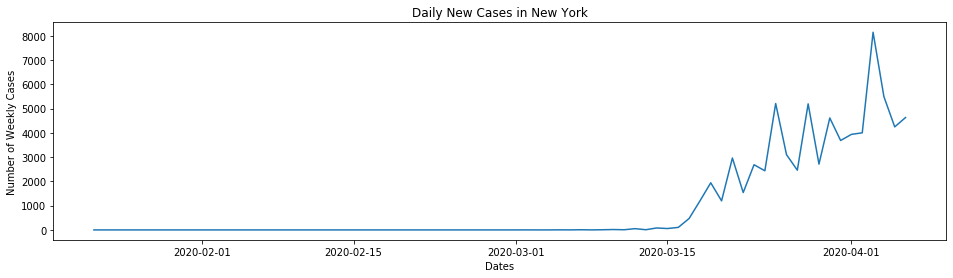

In [65]:
# Plotting daily new Cases in NY
plt.figure(figsize=(16, 4))
plt.plot(New_York.index,New_York.values)
plt.xlabel('Dates')
plt.ylabel('Number of Weekly Cases')
plt.title("Daily New Cases in New York")
plt.show()

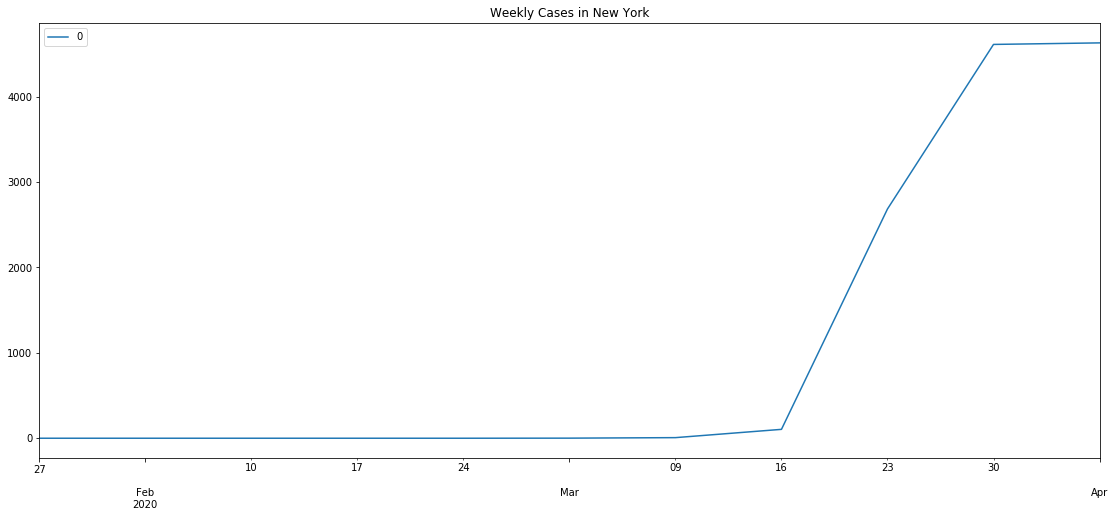

In [66]:
#Plotting weekly cases in NY
count = New_York
count=count.to_frame()
count=count.T
#count=count.to_frame()
count = count.iloc[:,5::7]
# count = count.T

count = count.T
count.plot.line(figsize  = (19,8), title="Weekly Cases in New York")

### If we look at the daily cases graph of New York, there have been multiple occasions when number of cases peak and drop and again peak. Looking at the last peak, the value reached 8k and then dropped to 4k, but looking at the past pattern, we cannot determine if New York peaked. 

### Now when we look at the weekly graph, we can see there has been an exponential increase in the number, but the graph started to plateau and can be predicted that the graph can go down.

### Hence, in my conclusion, I would say that there is a high possibility that COVID-19 has peaked in New York.

# Covid cases in Seattle

In [67]:
#Computing New cases in Seattle County
Seattle=covid_confirm.loc[(covid_confirm['County Name'] == 'King County')]
Seattle=Seattle[Seattle['State'] == 'WA']
Seattle=Seattle.iloc[:,4:-1]
Seattle=Seattle.T.diff().T
Seattle=Seattle.T
#New_York=New_York.sum(axis=0)
# New_York['1/22/2020']=0.0
Seattle

,3019
1/22/2020,NaN
1/23/2020,0.0
1/24/2020,0.0
1/25/2020,0.0
1/26/2020,0.0
...,...
4/2/2020,160.0
4/3/2020,55.0
4/4/2020,154.0
4/5/2020,293.0


In [68]:
Seattle.index = pd.to_datetime(Seattle.index)
Seattle.tail(20)

,3019
2020-03-18,0.0
2020-03-19,131.0
2020-03-20,100.0
2020-03-21,141.0
2020-03-22,106.0
2020-03-23,130.0
2020-03-24,107.0
2020-03-25,82.0
2020-03-26,218.0
2020-03-27,251.0


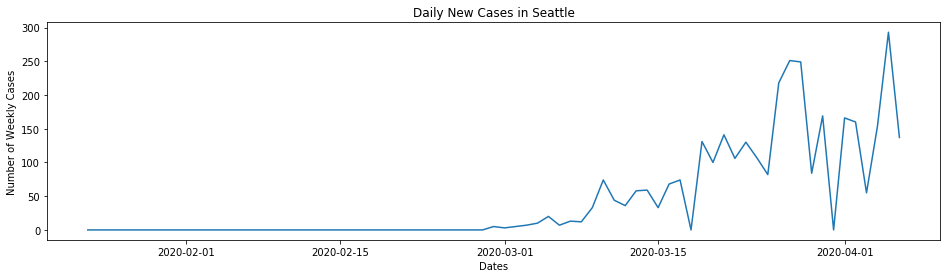

In [69]:
#Printing Daily cases in Seattle
plt.figure(figsize=(16, 4))
plt.plot(Seattle.index,Seattle.values)
plt.xlabel('Dates')
plt.ylabel('Number of Weekly Cases')
plt.title("Daily New Cases in Seattle")
plt.show()

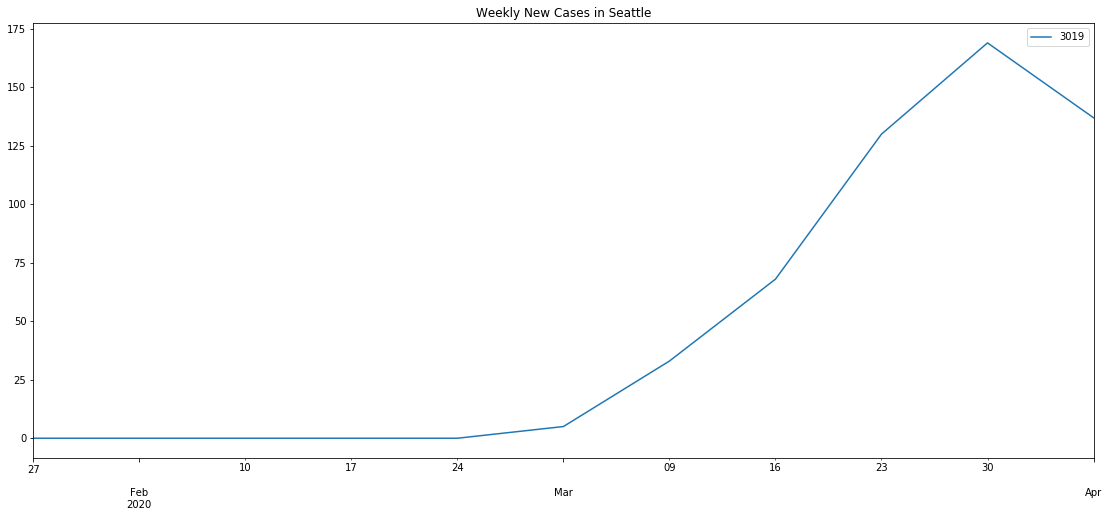

In [70]:
#plotting weekly cases in Seattle
count = Seattle
count=count.T
count = count.iloc[:,5::7]

count = count.T
count.plot.line(figsize  = (19,8), title="Weekly New Cases in Seattle")

###  Looking at the daily number of cases graph, it is difficult to say anything since there are many occasions where the number of cases spiked up very high and come down to 0 too. 

### Looking at the weekly number of cases graph, it is very clear that COVID-19 has already peaked in Seattle and is going down

### In conclusion, COVID-19 has already peaked in Seattle.